In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import random
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [2]:
segment_directory = "segmentation.csv"

segment = pd.read_csv(segment_directory, header=0)

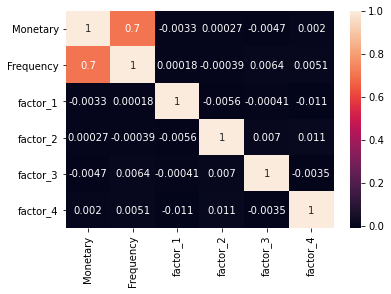

In [3]:
#Давайте посмотрим на корреляцию между параметрами
corr = segment.corr()
sns.heatmap(corr,annot = True)
plt.show()
#По матрице корреляций можно сделать вывод, что есть умеренная линейная зависимость между Frequency и Monetary,
#но при этом между факторами практически нет линейной зависимости.

In [4]:
#Самое логичное убрать CustomerId, так как он точно никак не может помочь в кластеризации, а может и помешать
#Ведь это просто уникальный идентификатор пользователя, он никак не поможет в кластеризации.
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    'factor_1',
    'factor_2',
    'factor_3',
    'factor_4'
]

In [5]:
segment = segment[columns]
segment

,Monetary,Frequency,factor_1,factor_2,factor_3,factor_4
0,100.40,6,0.35,0.08,0.609740,0.949383
1,170.00,4,0.66,0.16,0.942272,0.479846
2,70.75,6,0.92,0.20,0.323030,0.007076
3,75.00,10,0.35,0.78,0.876833,0.088974
4,94.51,5,0.51,0.44,0.912099,0.206194
...,...,...,...,...,...,...
15995,110.00,5,0.22,0.92,0.279858,0.012416
15996,175.00,9,0.66,0.55,0.045826,0.025403
15997,94.21,2,0.41,0.80,0.438510,0.665808
15998,3.35,1,0.75,0.17,0.009277,0.572111


In [6]:
def get_data(df):
    
    #для того, чтобы преобразовать текстовые значения в числовые используем LabelEncoder
    if ('Recency' in columns):
        df['Recency'] = le.fit_transform(df['Recency'])
        
    
    for column in columns:
        mx = df[column].max()
        mn = df[column].min()
        df[column]-=mn
        df[column]/=(mx+1e-8)
    
    x = df
    return x

In [7]:
#Попробуем поделить пользователей на 3 кластера.
#Те , кто платят мало, те, кто платят средне и те, кто платят много

In [8]:
def check_specific_columns(columns):
    
    x = get_data(segment)
    x = x[columns]
    x = np.array(x)
    
    kmeans = KMeans(n_clusters = 3)
    clustering = kmeans.fit(x)
    
    cl_1 = np.where(clustering.labels_==0)[0]
    cl_2 = np.where(clustering.labels_ == 1)[0]
    cl_3 = np.where(clustering.labels_==2)[0]
    cluster_1 = x[cl_1]
    cluster_2 = x[cl_2]
    cluster_3 = x[cl_3]
    
    #Посмотрим на средние значения кластеров
    print('Mean Monetary in cluster 1:',cluster_1[0,:].mean())
    print('Mean Monetary in cluster 2:',cluster_2[0,:].mean())
    print('Mean Monetary in cluster 3:',cluster_3[0,:].mean())


In [9]:
#Теперь давайте посмотрим, как факторы влияют на разбиение
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    'factor_1',
    'factor_2',
    'factor_3',
    'factor_4'
]
check_specific_columns(columns)

Mean Monetary in cluster 1: 0.5539674768059203
Mean Monetary in cluster 2: 0.36691618480381644
Mean Monetary in cluster 3: 0.34452993542642485


In [10]:
#Без первого фактора
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    #'factor_1',
    'factor_2',
    'factor_3',
    'factor_4'
]
check_specific_columns(columns)

Mean Monetary in cluster 1: 0.3435286766625599
Mean Monetary in cluster 2: 0.4647875934421162
Mean Monetary in cluster 3: 0.3704539436724511


In [11]:
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    'factor_1',
    #'factor_2',
    'factor_3',
    'factor_4'
]
check_specific_columns(columns)

Mean Monetary in cluster 1: 0.4330646889625078
Mean Monetary in cluster 2: 0.1276361351746838
Mean Monetary in cluster 3: 0.39752867612349485


In [12]:
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    'factor_1',
    'factor_2',
    #'factor_3',
    'factor_4'
]
check_specific_columns(columns)

Mean Monetary in cluster 1: 0.26508756597937183
Mean Monetary in cluster 2: 0.2915831335831915
Mean Monetary in cluster 3: 0.5640142524379861


In [13]:
columns = [
    'Monetary',
    #'Recency',
    'Frequency',
    'factor_1',
    'factor_2',
    'factor_3',
    #'factor_4'
]
check_specific_columns(columns)

Mean Monetary in cluster 1: 0.4697494118696609
Mean Monetary in cluster 2: 0.2236417136121454
Mean Monetary in cluster 3: 0.4226642214116116


In [14]:
#на самом деле, каких-то зависимостей между факторами я тут не вижу, возможно я что-то делаю не правильно.